# Comparison of $\eta$ result with Fenton's Fourier.exe

use waterwaves.py code

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves import unpack,IEj,wave
L_d,s=8,1.95
mxH_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
n_max=int(100*mxH_d)
d=2*np.pi/L_d

In [2]:
def get(n): # Read Fenton result n
    with open(f"moderate/L_d{L_d:02d}/{n:02d}.txt","rt") as fenton:
        comp=fenton.read()
    
    comp=comp.split('\n')
    
    targets=['d','H','c','Q','R','q','r']
    data={}
    jBE=[]
    for line in comp:
        if line:
            for target in targets:
                if f'({target})' in line:
                    data[target]=float(line.split('\t')[1]) #use first column of table in fenton file (L=2pi)
            if '0'<=line[1]<='9':
                jBE+=[line.split('\t')]
            
    data['Ub']=data.pop('c') # Ub is wave speed in my code
    if not 'd' in data:
        data['d']=0 # deep water
    J,B,E=np.array(jBE).T
    return data,J.astype(int),B.astype(float),E.astype(float)

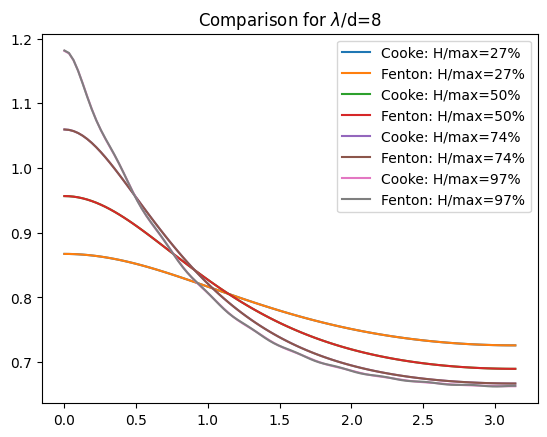

In [10]:
X=np.linspace(0,np.pi,100)
N=20
for n in range(n_max//4+2,n_max+1,n_max//4): # Fenton.exe happily went beyond H/d=11% but results were wobbly/unstable
    data,J,B,E=get(n) # Fenton result n
    H=n*d/100
    sol=wave(N,H,d=d,scaler=d+s*H)
    if not sol.success: # weed out fails and print analysis
        print(sol)
    else:
        Ej,Bj,Ub,Q,R=unpack(sol.x)
        plt.plot(X,IEj([d,*Ej],X),label=f"Cooke: H/max={H/d/mxH_d:.0%}")    
    plt.plot(X,IEj([d,*E.astype(float)],X),label=f"Fenton: H/max={data['H']/mxH_d/d:.0%}")
plt.legend()
plt.title(f'Comparison for $\\lambda$/d={L_d}')
plt.show()

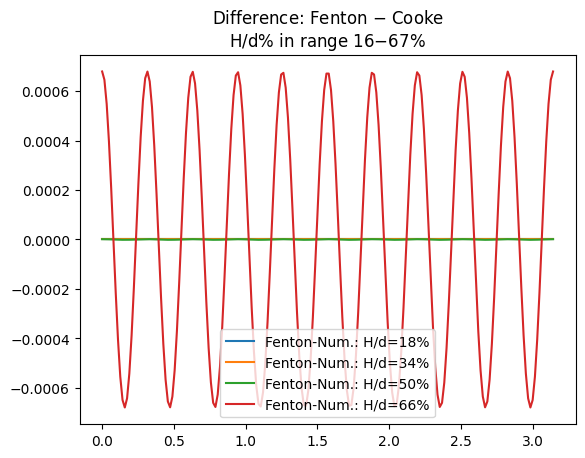

In [11]:
X=np.linspace(0,np.pi,200)
# Deviation increases as highest wave approached, reducing upper limit (13=12+1), shows deviation for less high waves
for n in range(n_max//4+2,n_max+1,n_max//4): 
    data,J,B,E=get(n) # Fenton result n
    H=n*d/100
    sol=wave(N,H,d=d,scaler=d+s*H)
    if not sol.success: # weed out hard fails and print analysis
        print(sol)
        continue
    Ej,Bj,Ub,Q,R=unpack(sol.x)
    Fenton=IEj([d,*E.astype(float)],X)
    Cooke=IEj([d,*Ej],X)
    plt.plot(X,Fenton-Cooke,label=f"Fenton-Num.: H/d={H/d:.0%}")
plt.legend()
plt.title(f'Difference: Fenton $-$ Cooke\nH/d% in range {n_max//4}$-${n_max}%')
plt.show()